In [1]:
!unzip /content/Dataset.v1i.yolov8.zip -d /content/

Archive:  /content/Dataset.v1i.yolov8.zip
   creating: /content/Dataset.v1i.yolov8/
  inflating: /content/Dataset.v1i.yolov8/data.yaml  
  inflating: /content/Dataset.v1i.yolov8/README.dataset.txt  
  inflating: /content/Dataset.v1i.yolov8/README.roboflow.txt  
   creating: /content/Dataset.v1i.yolov8/test/
   creating: /content/Dataset.v1i.yolov8/test/images/
  inflating: /content/Dataset.v1i.yolov8/test/images/frame00048_png.rf.142c63bd60cb5e595d6c14ce52ea1ff1.jpg  
  inflating: /content/Dataset.v1i.yolov8/test/images/frame00096_png.rf.35c448749610b024028861e6e8373cfb.jpg  
  inflating: /content/Dataset.v1i.yolov8/test/images/frame00143_png.rf.96e840c7ab33d9a8f12d78af3dda2bcd.jpg  
  inflating: /content/Dataset.v1i.yolov8/test/images/frame00184_png.rf.cce634186c4bcf31b0f4a79b8c5dd022.jpg  
  inflating: /content/Dataset.v1i.yolov8/test/images/frame00208_png.rf.676a5cd927dfc622b1b53463d4a010b5.jpg  
  inflating: /content/Dataset.v1i.yolov8/test/images/frame00260_png.rf.58a66c7a4c795c2b

In [2]:
# 1. Check GPU and CUDA versions
!nvidia-smi

# 2. Install the Ultralytics library (YOLOv8)
!pip install ultralytics

# 3. Run a system check to confirm setup (optional but good practice)
!yolo checks

Tue Dec  9 18:22:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
import os

# Define the dataset path
dataset_path = "/content/Dataset.v1i.yolov8"

print("🔄 Starting Data Fix...")

# 1. FIX LABELS: Walk through all folders and fix .txt files using Python
#    This avoids shell variable issues entirely.
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".txt") and "README" not in file:
            file_path = os.path.join(root, file)

            # Read the file
            with open(file_path, 'r') as f:
                lines = f.readlines()

            # Write corrections (Change class '1' to '0')
            with open(file_path, 'w') as f:
                for line in lines:
                    if line.startswith('1 '):
                        f.write('0 ' + line[2:])
                    else:
                        f.write(line)

print("✅ All label files have been processed and corrected.")

# 2. DELETE CACHE: Explicitly remove cache files to force a re-scan
for split in ['train', 'valid', 'test']:
    cache_path = os.path.join(dataset_path, split, 'labels.cache')
    if os.path.exists(cache_path):
        os.remove(cache_path)
        print(f"🗑️  Deleted old cache: {cache_path}")

print("🚀 Data is clean and ready for training!")

🔄 Starting Data Fix...
✅ All label files have been processed and corrected.
🗑️  Deleted old cache: /content/Dataset.v1i.yolov8/train/labels.cache
🗑️  Deleted old cache: /content/Dataset.v1i.yolov8/valid/labels.cache
🚀 Data is clean and ready for training!


In [11]:
# Start Training
!yolo task=detect mode=train \
    model=yolov8n.pt \
    data={dataset_path}/data.yaml \
    epochs=20 \
    imgsz=640 \
    name=faculty_presentation_run

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Dataset.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=faculty_presentation_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/9 /content/Dataset.v1i.yolov8/test/images/GRMN0160_MP4-0_jpg.rf.ece3964faea201edd0b3f7d7e7244e52.jpg: 384x640 (no detections), 45.4ms
image 2/9 /content/Dataset.v1i.yolov8/test/images/GRMN0234_MP4-16_jpg.rf.9de8d2a7c9217f8ad68b23b6b2f04b03.jpg: 384x640 (no detections), 5.8ms
image 3/9 /content/Dataset.v1i.yolov8/test/images/GRMN0661_MP4-9_jpg.rf.337103d0d96d90d120a606e39cf7d502.jpg: 384x640 (no detections), 5.7ms
image 4/9 /content/Dataset.v1i.yolov8/test/images/frame00048_png.rf.142c63bd60cb5e595d6c14ce52ea1ff1.jpg: 384x640 (no detections), 5.8ms
image 5/9 /content/Dataset.v1i.yolov8/test/images/frame00096_png.rf.35c448749610b024028861e6e8373cfb.jpg: 384x640 (no detections), 14.8ms
image 6/9 /content/Dataset.v1i.yolov8/test/images/frame00143_png.rf.96e840c7ab33d9a8f12d78af3dda2bcd.jpg: 384x640 (no detections), 10.7m

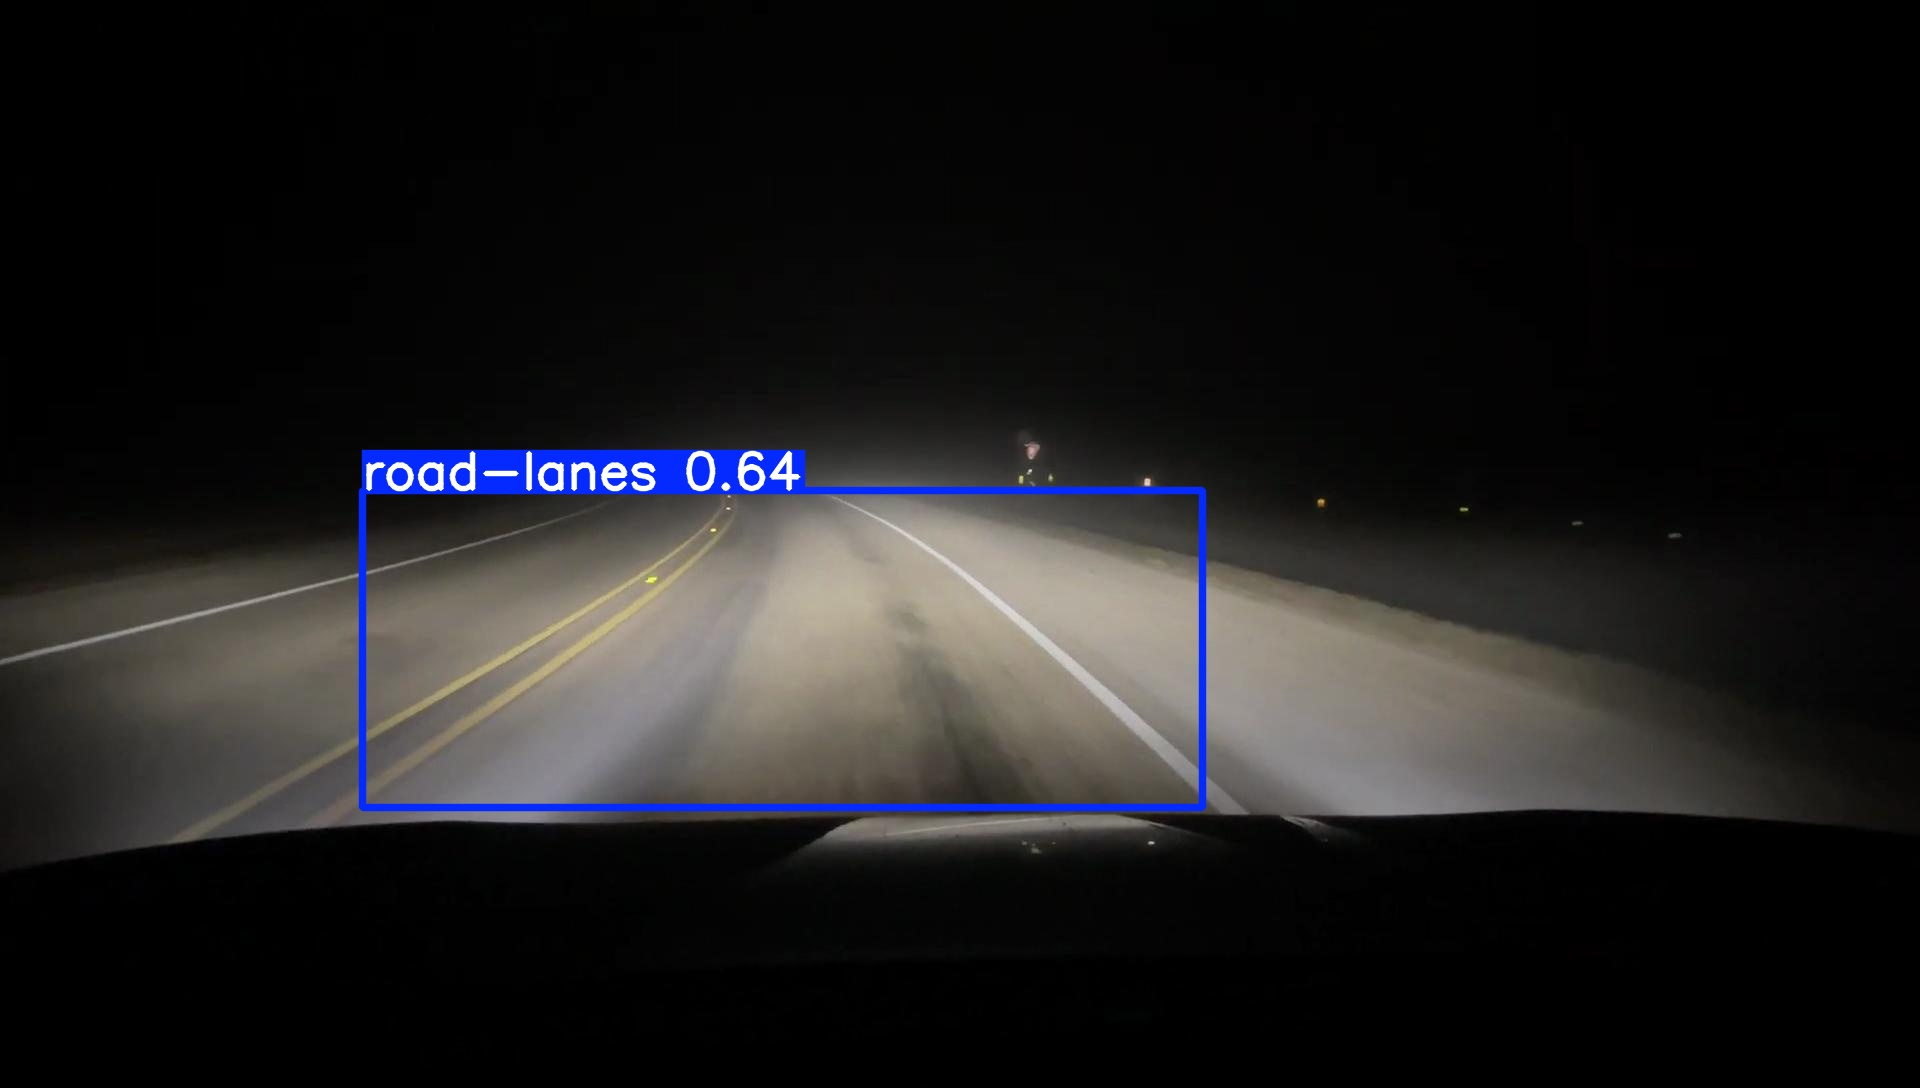

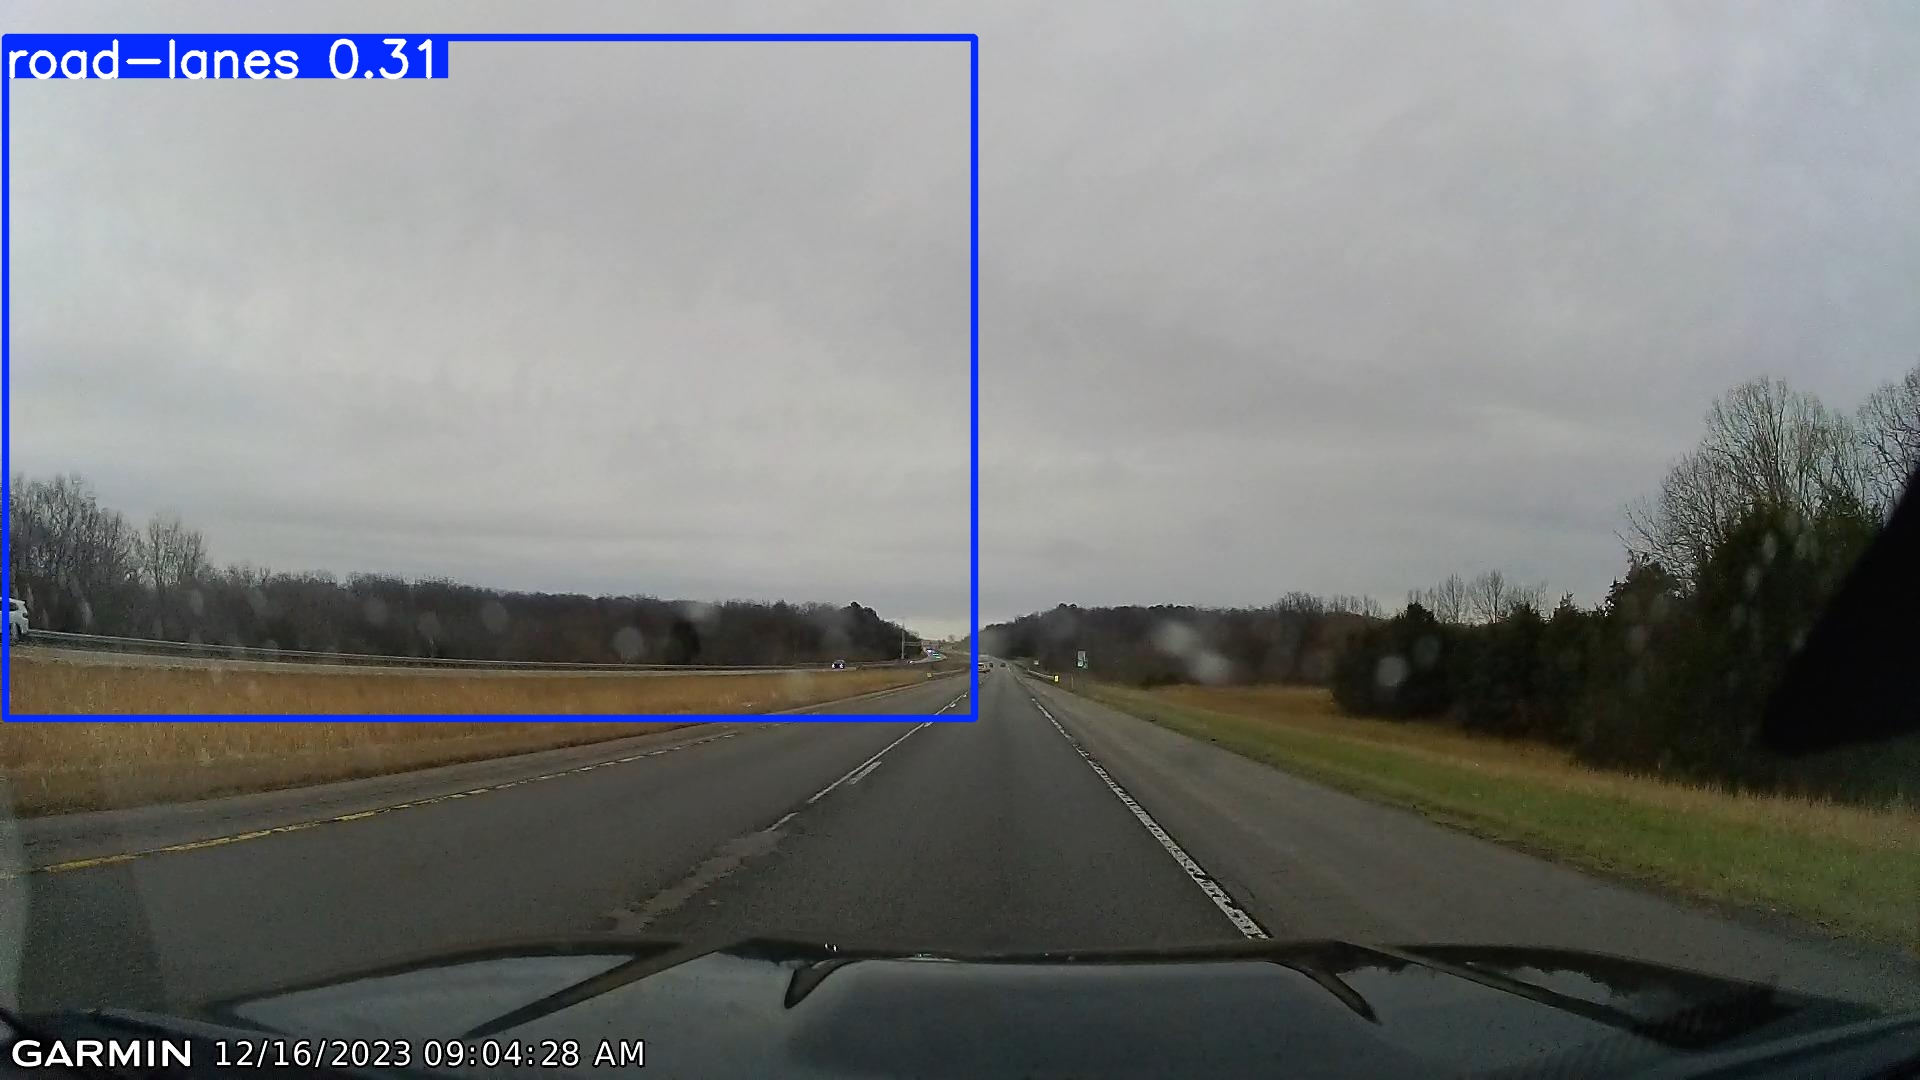

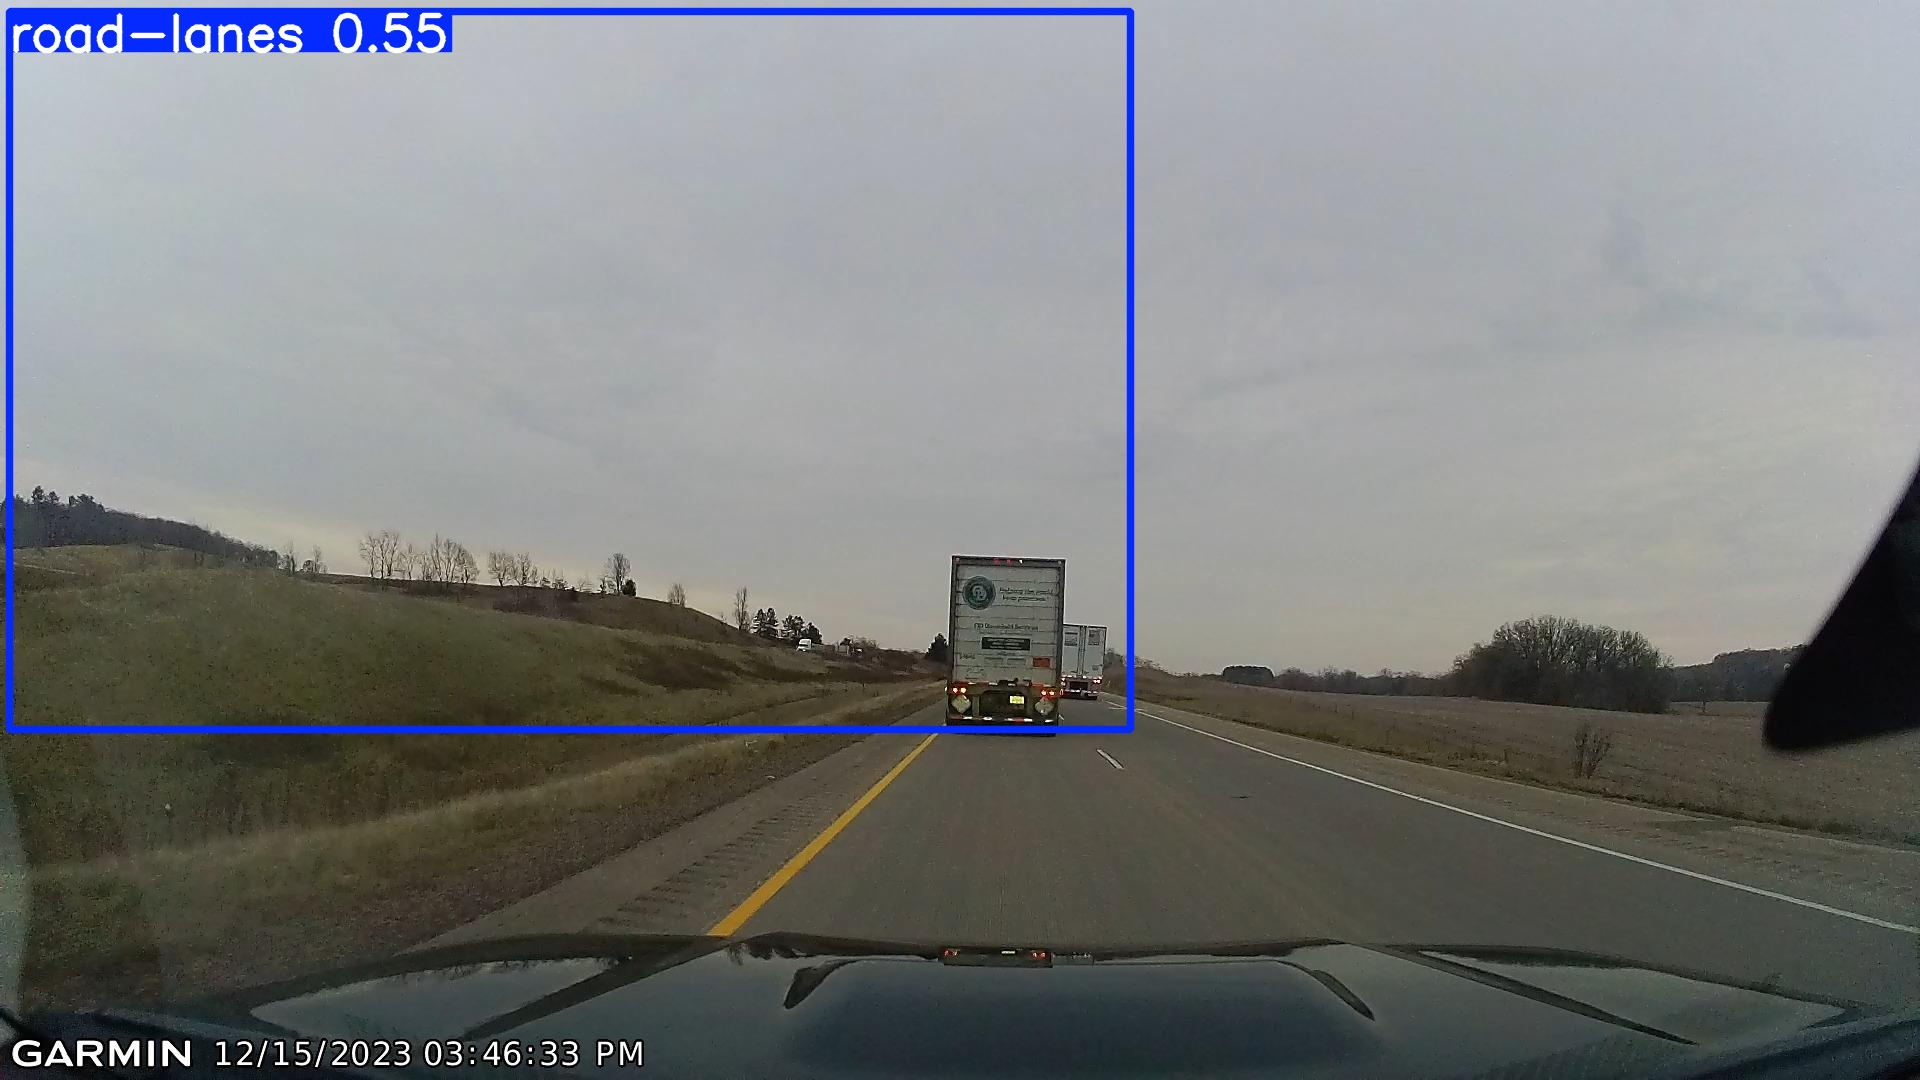

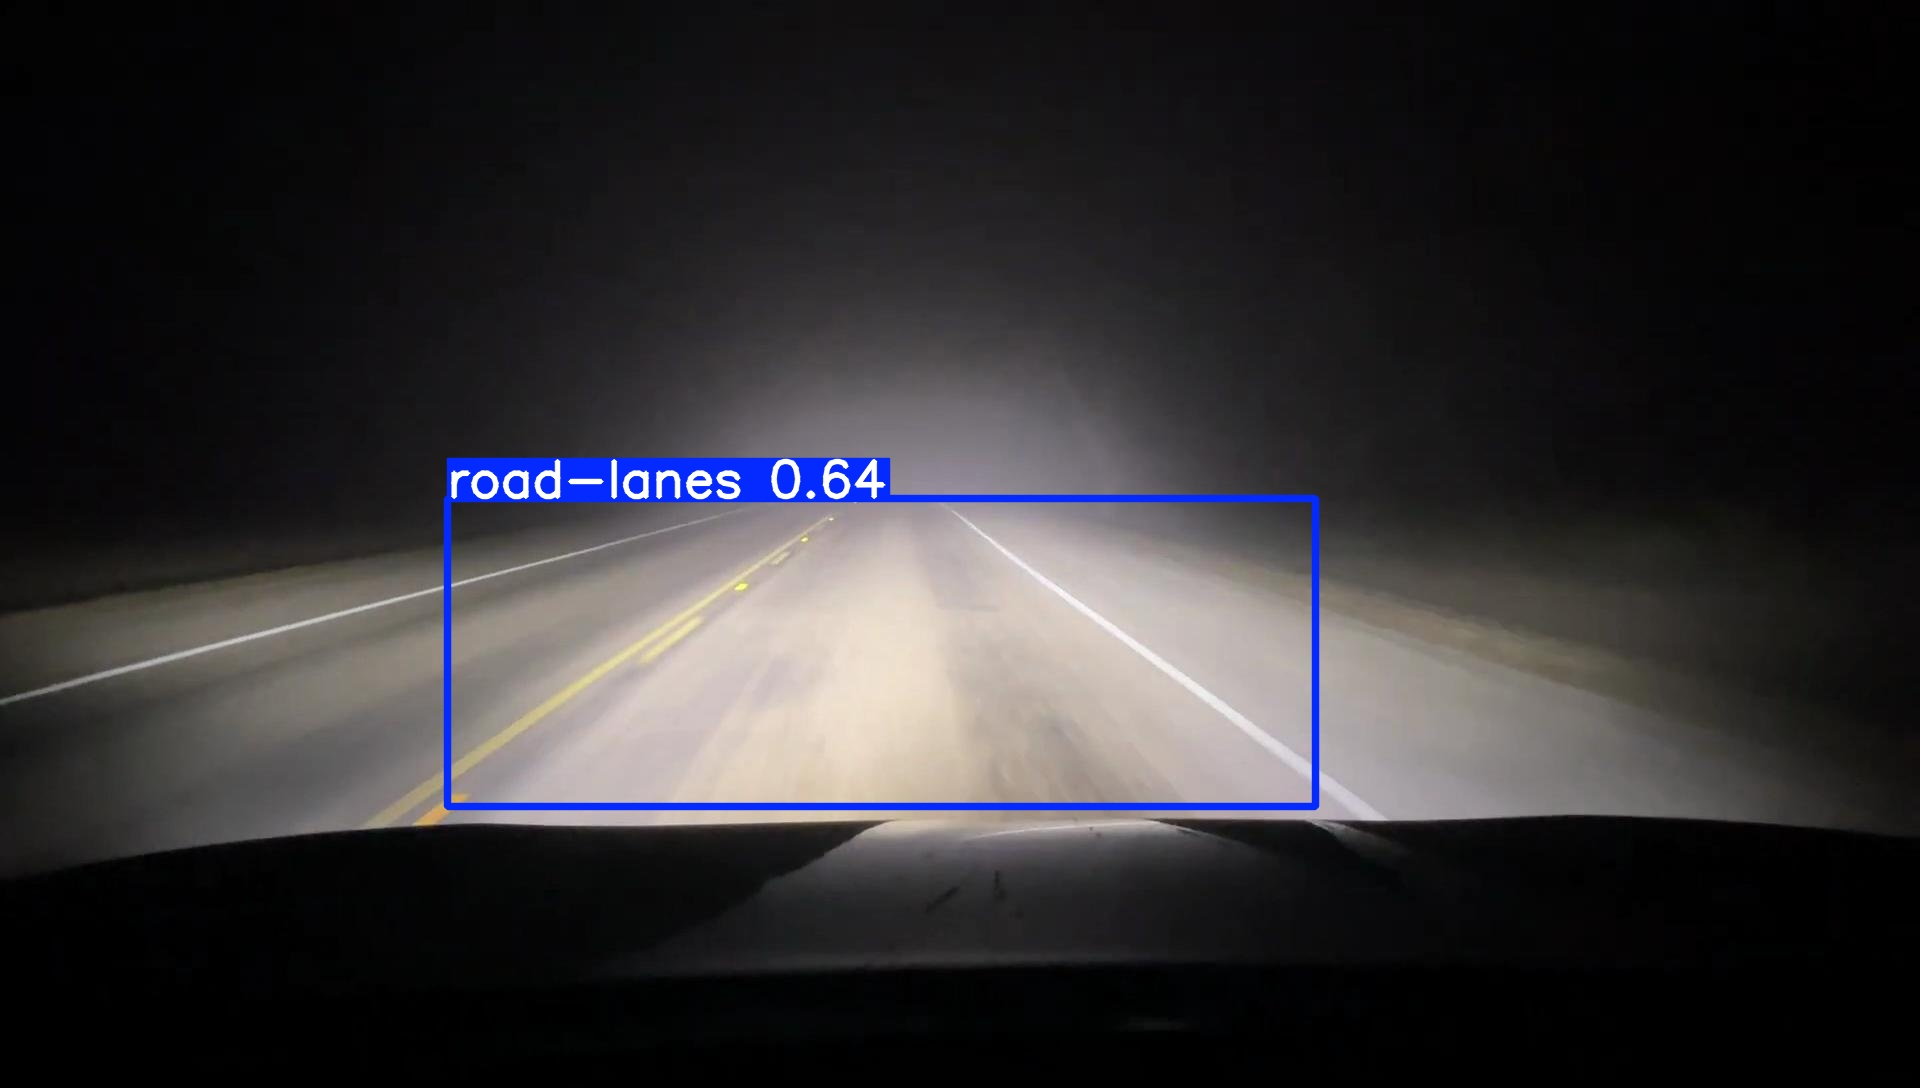

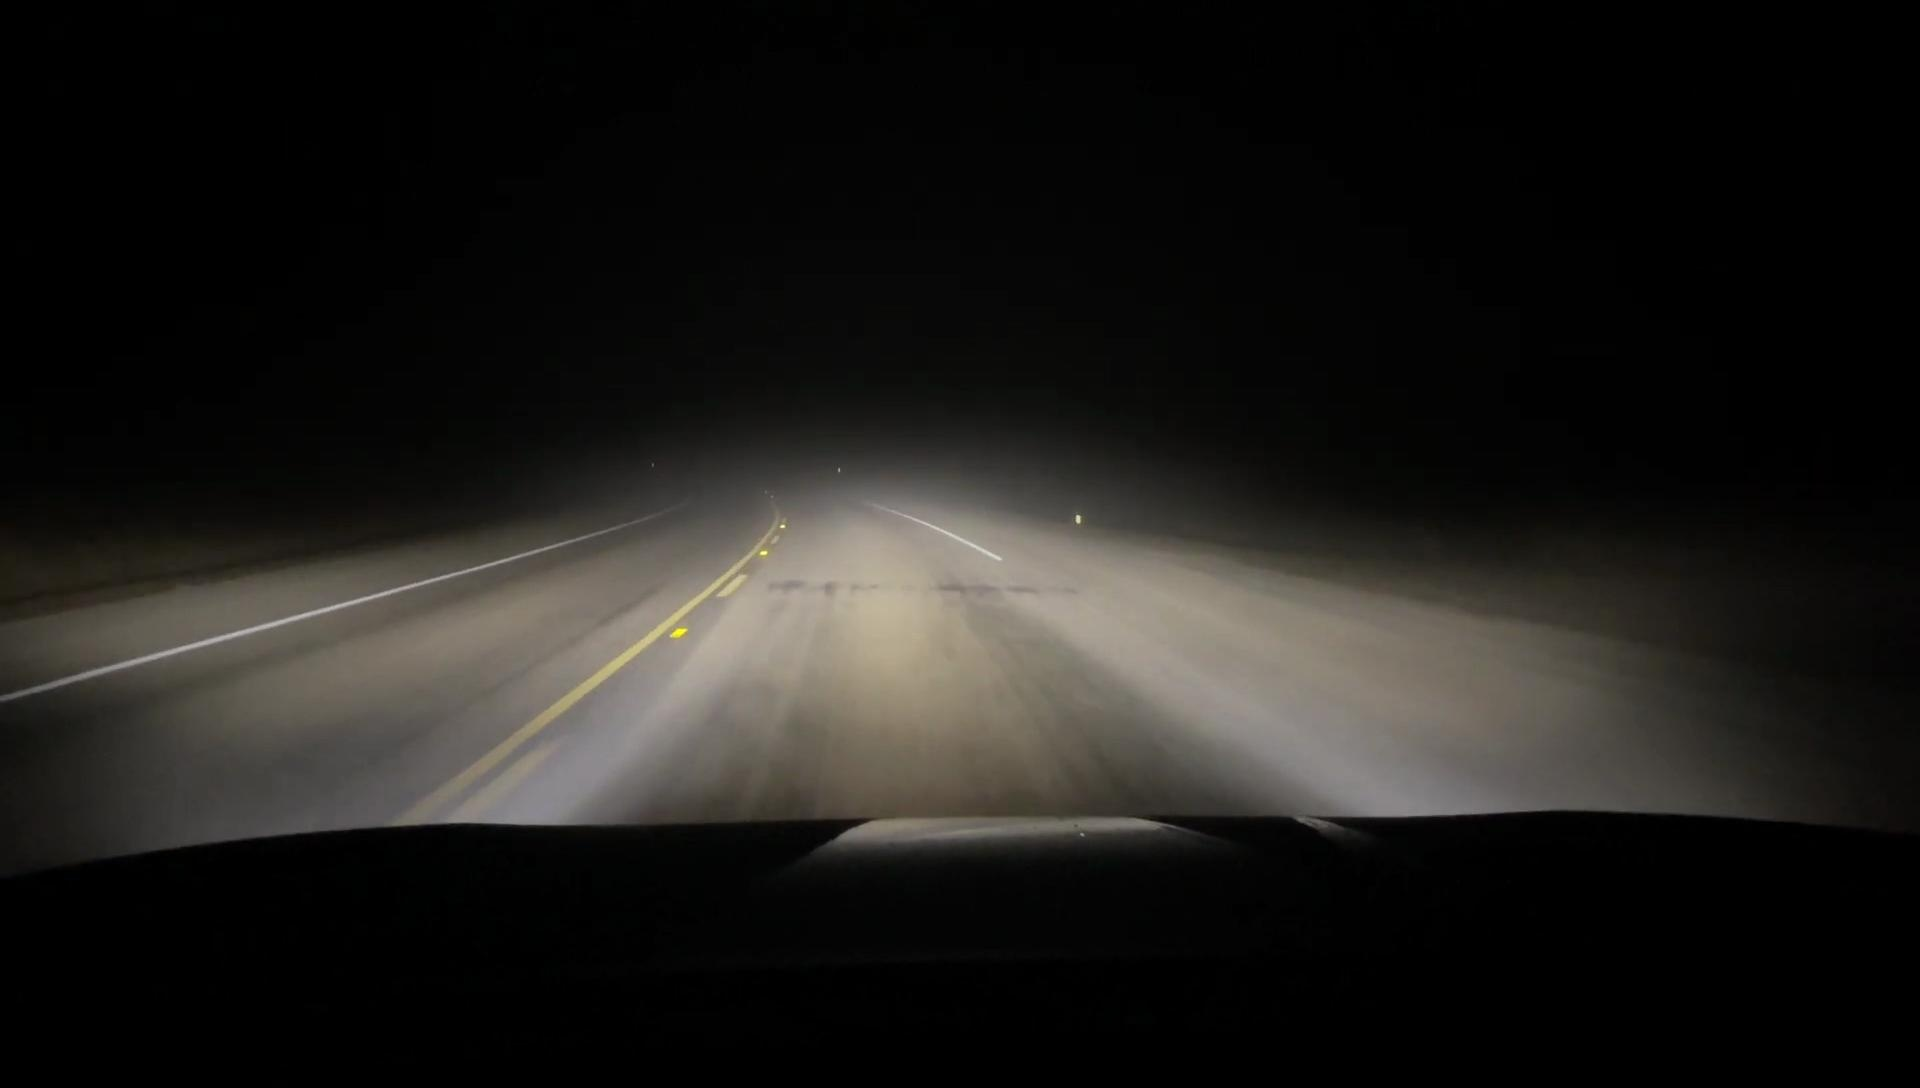

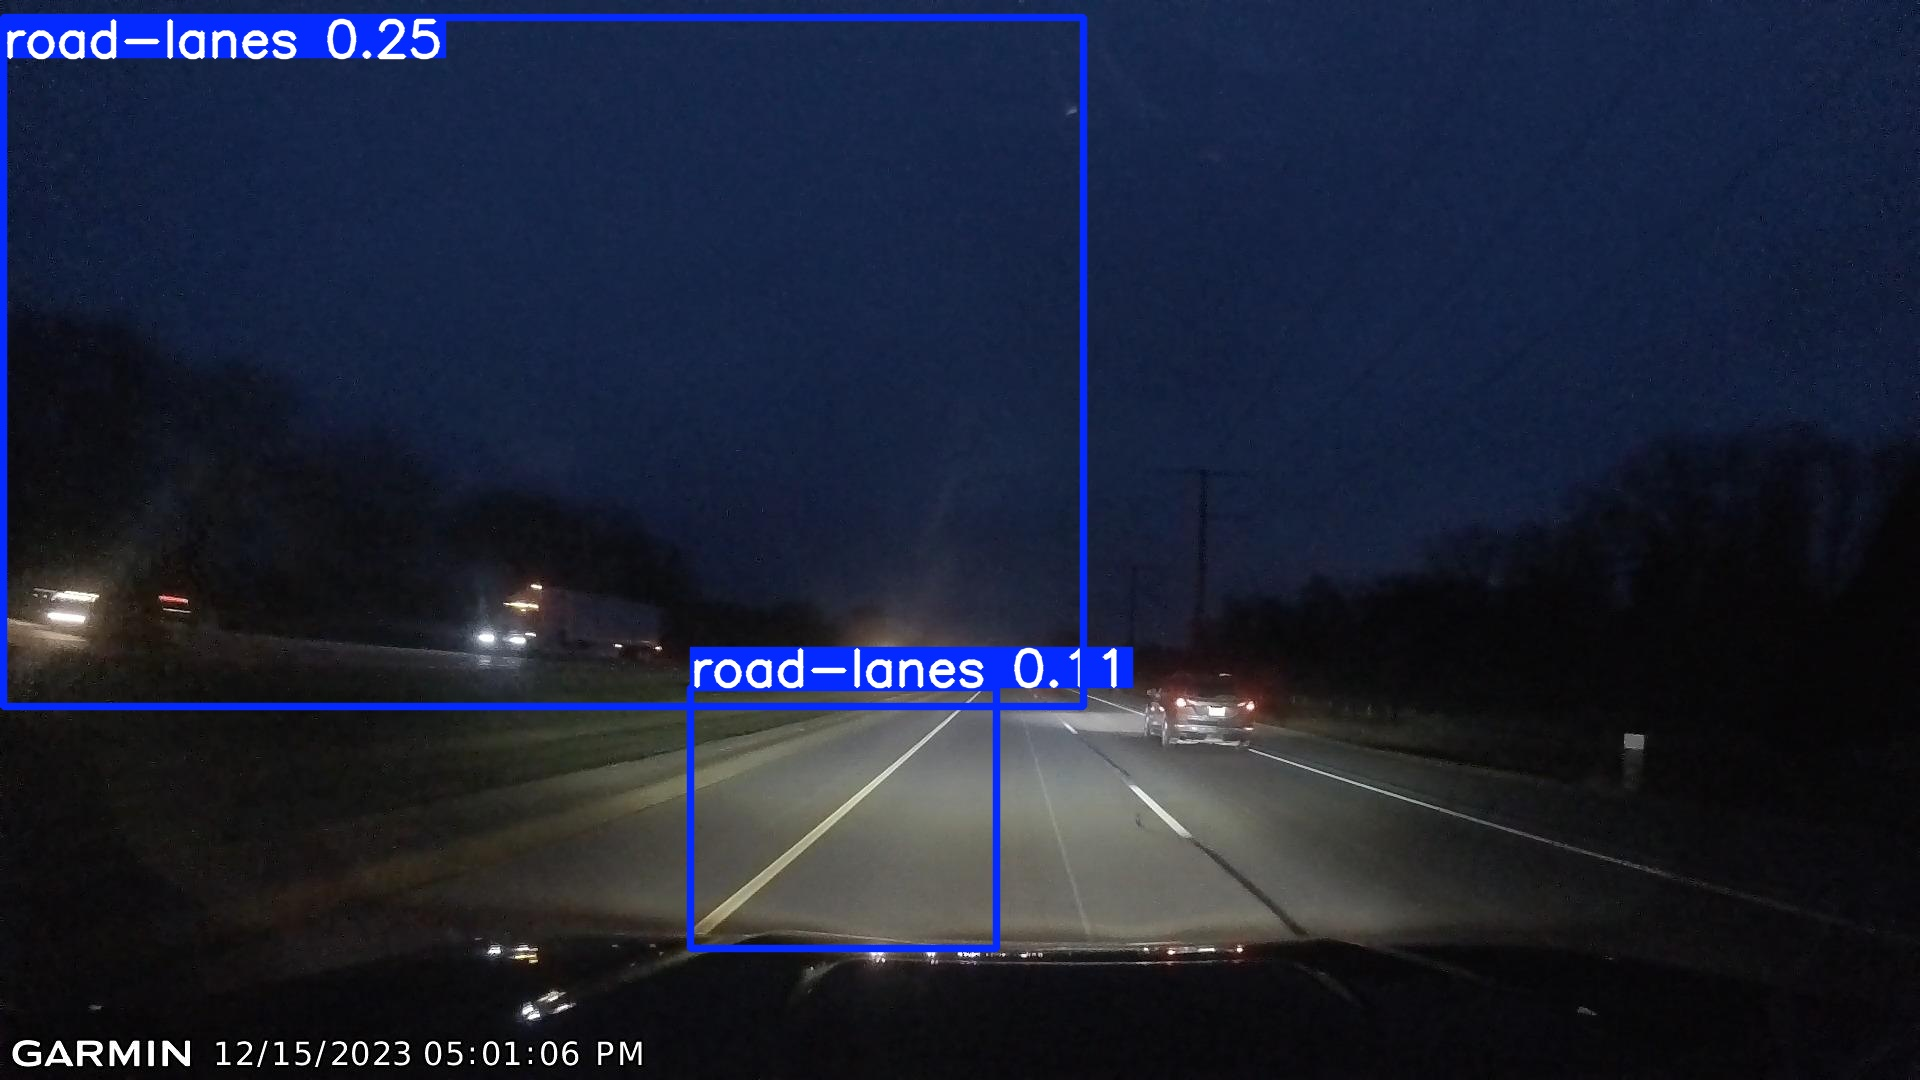

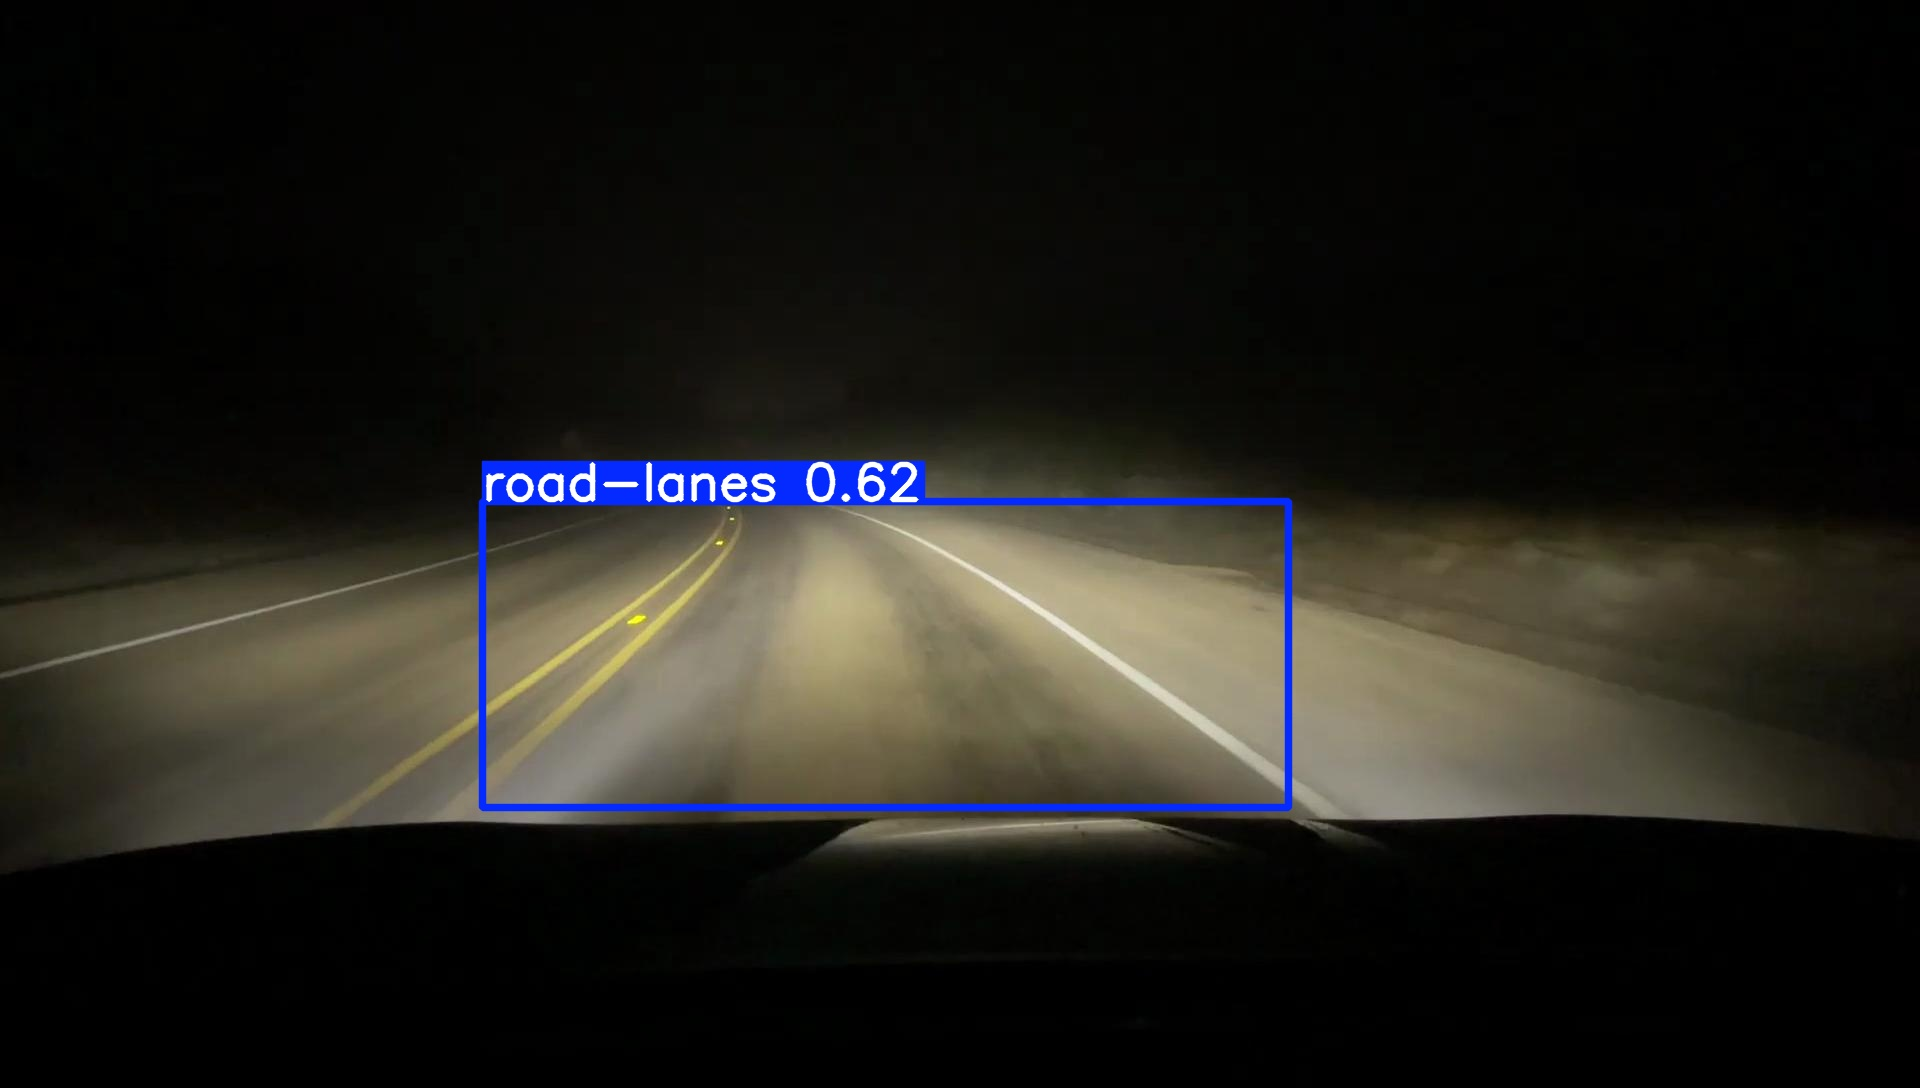

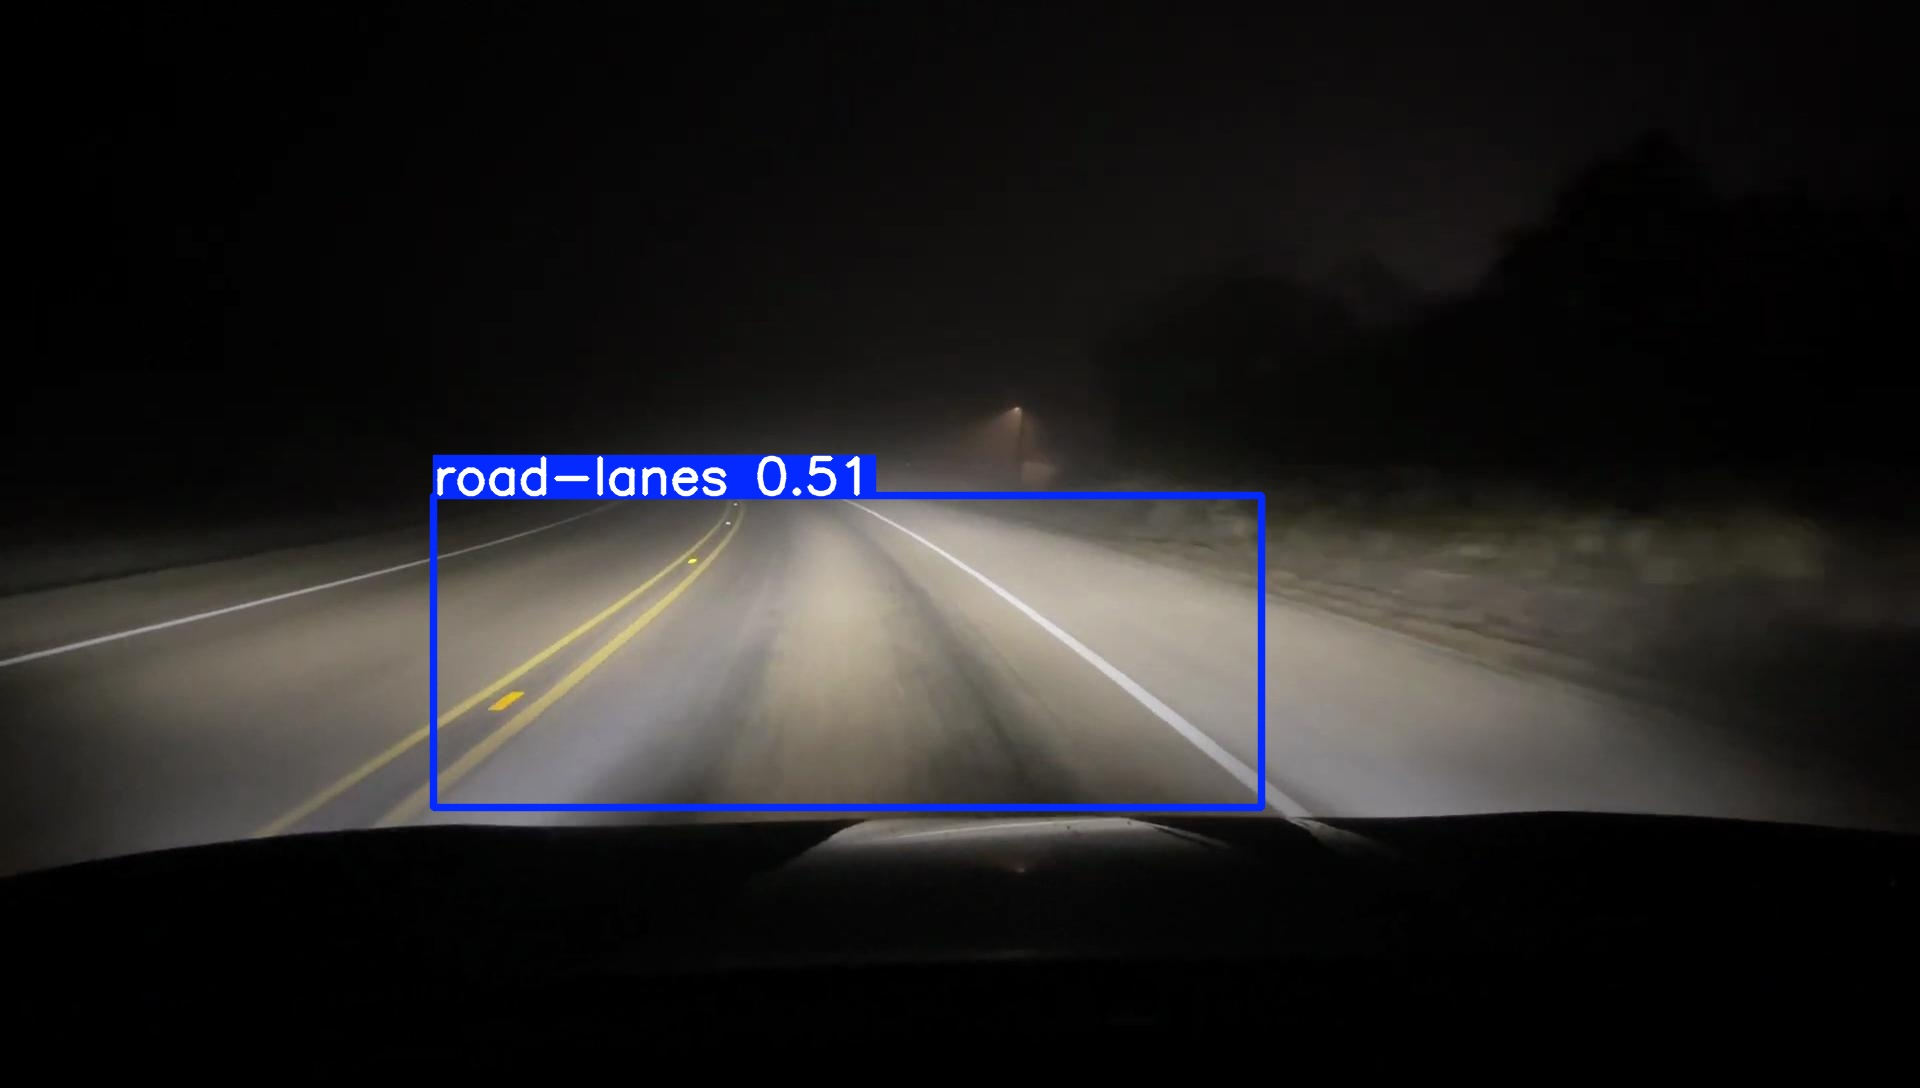

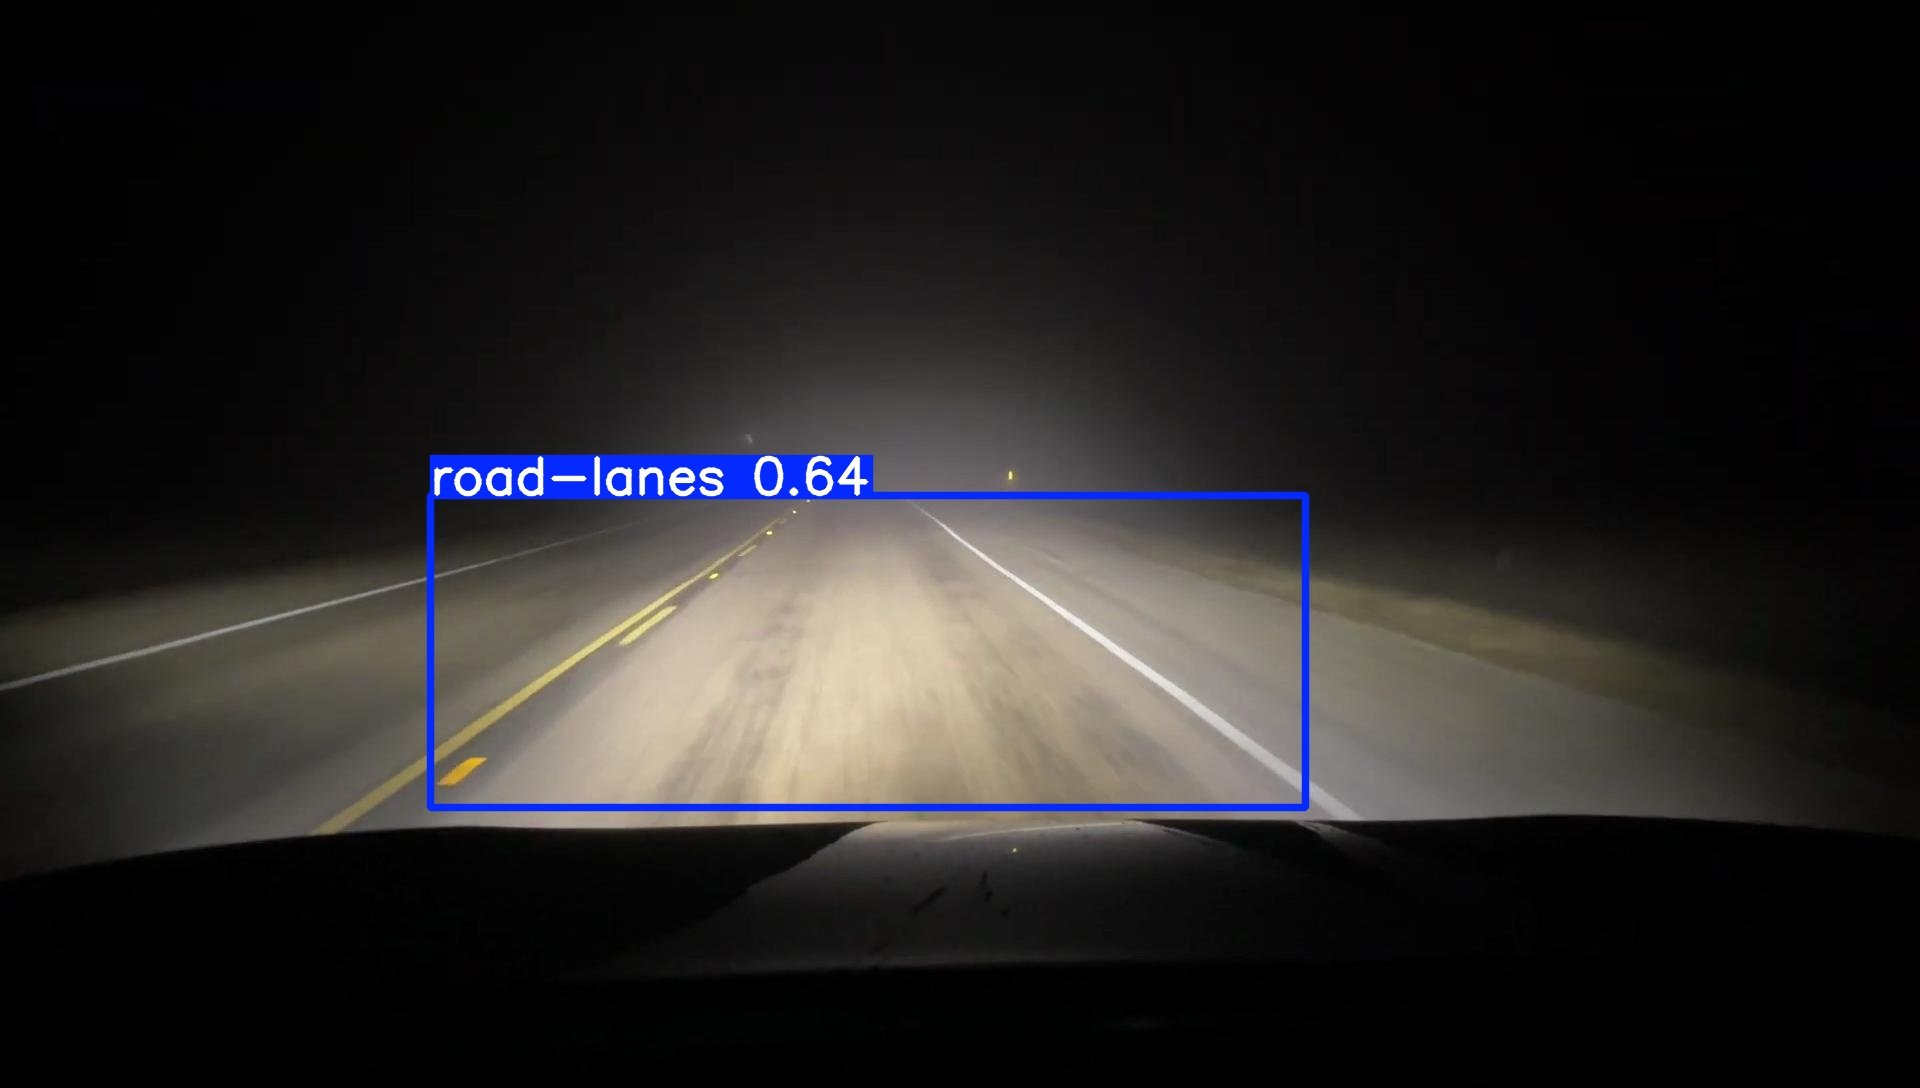

In [14]:
# Re-run prediction with a lower confidence threshold (conf=0.1)
!yolo task=detect mode=predict \
    model=/content/runs/detect/faculty_presentation_run/weights/best.pt \
    source=/content/Dataset.v1i.yolov8/test/images \
    save=True \
    name=low_confidence_check \
    conf=0.9

# Display the new results to see if the missing boxes appeared
import glob
from IPython.display import Image, display

print("\n👇 Results with LOWER confidence (0.1):")
output_dir = "/content/runs/detect/low_confidence_check"
for image_path in glob.glob(f'{output_dir}/*.jpg')[:10]:
    display(Image(filename=image_path, height=400))
    print('\n')